## 7. 二八轮动
对比创业板与沪深300指数的40天Mom，创业板强选Mom10因子，沪深强选价值因子。

In [7]:
import pandas as pd
import numpy as np


hs300 = "C:/Users/small/Desktop/June Second/excel_data/Value_Selection.xlsx"
gem = "C:/Users/small/Desktop/June Second/excel_data/GEM_MOM.xlsx"
mom = "C:/Users/small/Desktop/June Second/excel_data/index_mom.xlsx"


hs300 = pd.read_excel(hs300, index_col='date')
gem = pd.read_excel(gem, index_col='date')
mom = pd.read_excel(mom, index_col='datetime')


def get_per(frame, bool_index):
    per = pd.Series(map(lambda item: 1.0/len(item[1][item[1]==True]), frame.iterrows()), frame.index)
    use = pd.Series(bool_index.dropna(), per.index)
    use.replace(True, 0.8, True)
    use.replace(False, 0.2, True)
    per = per*use
    frame = frame.replace(True, 1.0).replace(False, 0.0)
    for column in frame.columns:
        frame[column] = frame[column]*per
    return frame


per_300 = get_per(hs300, mom['hs300_mom'] > mom['gem_mom'])
per_gem = get_per(gem, mom['hs300_mom'] <= mom['gem_mom'])

intersection = list(set(per_300.columns).intersection(set(per_gem.columns)))
intersections = pd.DataFrame({code: per_300.pop(code)+per_gem.pop(code) for code in intersection})

per_300[per_gem.columns] = per_gem
per_300[intersections.columns] = intersections
save = per_300.dropna(how='all').replace(0, np.NaN)
# save..to_excel('target_position.xlsx')
save

,000001.XSHE,000002.XSHE,000008.XSHE,000009.XSHE,000027.XSHE,000039.XSHE,000060.XSHE,000061.XSHE,000063.XSHE,000069.XSHE,...,300085.XSHE,300104.XSHE,300124.XSHE,300133.XSHE,300144.XSHE,300146.XSHE,300168.XSHE,300182.XSHE,300251.XSHE,300315.XSHE
date,,,,,,,,,,,,,,,,,,,,,
2010-07-01 15:00:00,NaN,NaN,NaN,0.004444,0.004444,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-02 15:00:00,NaN,NaN,NaN,0.004444,0.004444,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-05 15:00:00,NaN,NaN,NaN,0.004444,0.004444,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-06 15:00:00,NaN,NaN,NaN,0.004444,0.004444,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-07 15:00:00,NaN,NaN,NaN,0.004444,0.004444,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-08 15:00:00,NaN,NaN,NaN,0.004545,0.004545,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-09 15:00:00,NaN,NaN,NaN,0.004545,0.004545,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-12 15:00:00,NaN,NaN,NaN,0.004545,0.004545,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-13 15:00:00,NaN,NaN,NaN,0.004545,0.004545,NaN,NaN,NaN,NaN,NaN,...,0.011765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


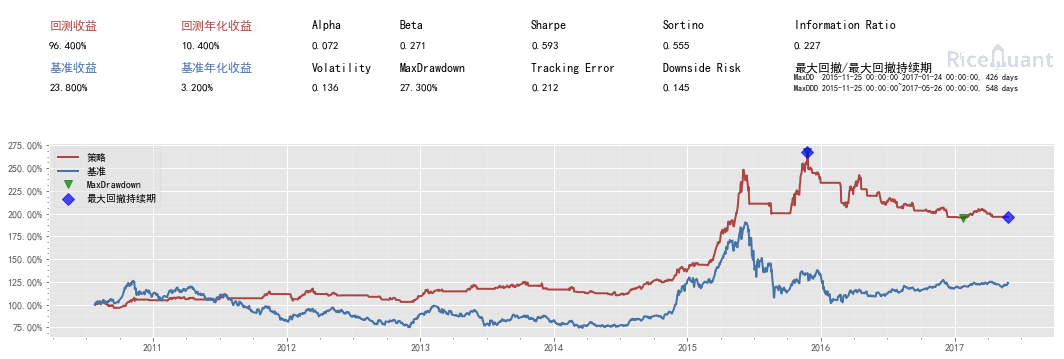

{'sys_analyser': {'benchmark_portfolio':                cash  market_value  static_unit_net_value  total_value  \
  date                                                                    
  2010-07-26  2119.16   19997880.84                  1.000  20000000.00   
  2010-07-27  2119.16   19888752.08                  1.000  19890871.24   
  2010-07-28  2119.16   20372504.08                  0.995  20374623.24   
  2010-07-29  2119.16   20473949.72                  1.019  20476068.88   
  2010-07-30  2119.16   20408998.90                  1.024  20411118.06   
  2010-08-02  2119.16   20753529.92                  1.021  20755649.08   
  2010-08-03  2119.16   20388510.58                  1.038  20390629.74   
  2010-08-04  2119.16   20462923.02                  1.020  20465042.18   
  2010-08-05  2119.16   20280804.62                  1.023  20282923.78   
  2010-08-06  2119.16   20613953.24                  1.014  20616072.40   
  2010-08-09  2119.16   20760359.36                  1.031  2

In [6]:
# coding=utf-8
from rqalpha import run_code

code = """
import numpy as np
import talib as ta
import pandas as pd
import os
import rqalpha
from datetime import datetime
from rqalpha.api import *
from fxdayu_data import DataAPI

data_codes = pd.read_excel('D:/PycharmProjects/Quant_Alpha/Data_Manager/Valuation_Selection/target_position.xlsx', index_col='date')

def init(context):
    context.target = data_codes
    DataAPI.set_file('D:/PycharmProjects/Quant_Alpha/Data_Manager/Valuation_Selection/config.py')
    df = DataAPI.candle('sh000001', 'D')
    df['MA_hedge'] = ta.abstract.MA(df, 30)
    context.df = df

def handle_bar(context, bar_dict):
    if can_trade(context):
        buy(context)
    
def buy(context):
    try:
        target = context.target.loc[context.now]
        target = target.dropna()
        for stock in context.portfolio.positions:
            if stock not in target.index:
                order_target_percent(stock, 0)
        for code, percent in target.iteritems():
            order_target_percent(code, percent)

    except Exception:
        pass
        
def sell_all(context):
    for stock in context.portfolio.positions:
        order_target_percent(stock, 0)

def can_trade(context):
    if context.df.close.loc[context.now] < context.df.MA_hedge.loc[context.now]:
        sell_all(context)
        return False
    else:
        return True

"""
    

config = {
    "base": {
        "start_date": "2010-07-25",
        "end_date": "2017-05-30",
        "frequency": '1d',
        "securities": ['stock', 'future'],
        "stock_starting_cash": 10000000,
        "future_starting_cash": 10000000,
        "benchmark": "000300.XSHG"
    },
    "extra": {
        "log_level": "verbose",
    },
    "mod": {
        "sys_analyser": {
            "report_save_path": '.',
            "enabled": True,
            "plot": True
        }
    }
}

run_code(code, config)